# Midterm 

Nick Goralka
Priciples of EM for HSDD

In [2]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import pandas as pd

freqs = np.linspace(1, 20e9, 200)
e_s = 4.4 
e_infinity = 4.24
tau = 3.74e-11
c = 11.8 # inches per nsec

def rel_dielectric (omega, e_s = e_s, e_infiity = e_infinity, tau = tau):
    return (e_s + e_infiity*(omega * tau)**2) / (1 + (omega*tau)**2)

v_rel_dielectric = np.vectorize(rel_dielectric)

rel_dielectric_vals = v_rel_dielectric( 2 * math.pi * freqs)



/tmp/ipykernel_1112/1422101198.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


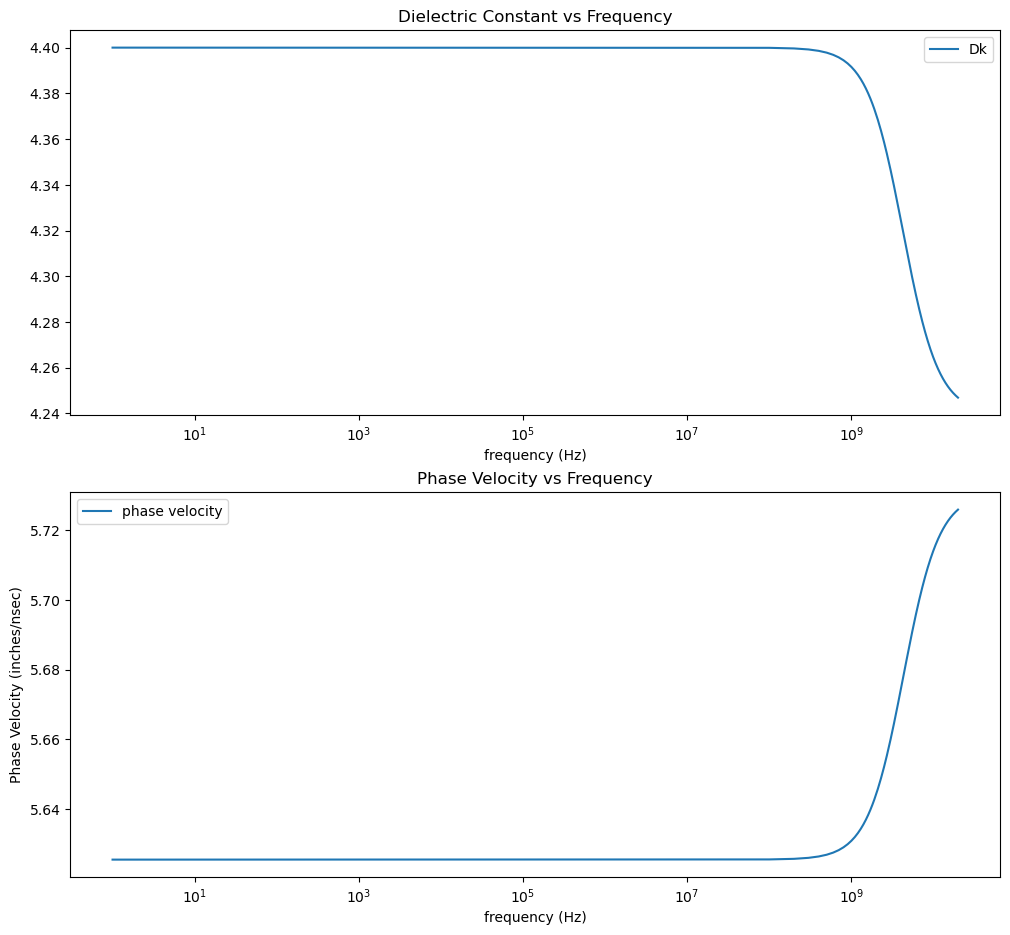

In [30]:

def calc_phase_vel (x):
    return c/math.sqrt(x)

v_calc_phase_vel = np.vectorize(calc_phase_vel)
phase_vel_vals = v_calc_phase_vel(rel_dielectric_vals)

data_vel = { 'frequency (Hz)' : freqs,
         'phase velocity' : phase_vel_vals}

data_vel = pd.DataFrame(data_vel)
data_vel = data_vel.set_index('frequency (Hz)')

data_Dk = { 'frequency (Hz)' : freqs,
         'Dk' : rel_dielectric_vals}

data_Dk = pd.DataFrame(data_Dk)
data_Dk = data_Dk.set_index('frequency (Hz)')

# Set the width and height of the figure
fig, axes = plt.subplots(2, 1)

fig.set_size_inches(12, 11)

axes[1].set_yscale('linear')
axes[1].set_xscale('log')
axes[0].set_yscale('linear')
axes[0].set_xscale('log')


axes[0].set_title("Dielectric Constant vs Frequency")
sns.lineplot(data_Dk, ax=axes[0])

# Add title
axes[1].set_title("Phase Velocity vs Frequency")
plt.ylabel("Phase Velocity (inches/nsec)")
ax1.set_yscale('linear')
ax1.set_xscale('log')

sns.lineplot(data_vel, ax=axes[1])

fig.show()